# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [ ]:
def apply_svd_custom(X_train, X_test, n_components):
    """
    Applies SVD dimensionality reduction to the input data.

    Args:
        X_train: Training data.
        X_test: Test data.
        n_components: Number of components to keep after SVD.

    Returns:
        X_train_reduced: Reduced training data.
        X_test_reduced: Reduced test data.
        U: Matrix of singular vectors.
    """
    # Calculate the covariance matrix
    X_cov = np.cov(X_train.T)

    # Perform SVD on the covariance matrix
    U, S, V = np.linalg.svd(X_cov)

    # Select the top n_components singular vectors
    U_reduced = U[:, :n_components]

    # Project the training and test data onto the reduced subspace
    X_train_svd = np.dot(X_train, U_reduced)
    X_test_svd = np.dot(X_test, U_reduced)

    return X_train_svd, X_test_svd, U


## Part 3: Train Logistic Regression and Measure Performance

In [ ]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [ ]:
svd_components = [784, 500, 200, 100, 50, 20]  # Adjust as per your requirement.
results = []

print("Training models with different levels of SVD preprocessing...")
U_all = []  # List to store U for each component size
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd, U = apply_svd_custom(X_train, X_test, n_components)

    # Store U for later visualization
    U_all.append(U)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

    # Append the results to the list
    results.append((n_components, accuracy, training_time))


Training models with different levels of SVD preprocessing...
Applying custom SVD with 784 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9209, Training time: 877.9758 seconds
Applying custom SVD with 500 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 500, Accuracy: 0.9205, Training time: 535.7327 seconds
Applying custom SVD with 200 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.9206, Training time: 154.2163 seconds
Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 57.8319 seconds
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9080, Training time: 13.8423 seconds
Applying custom SVD with 20 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 20, Accuracy: 0.8784, Training time: 1.8101 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


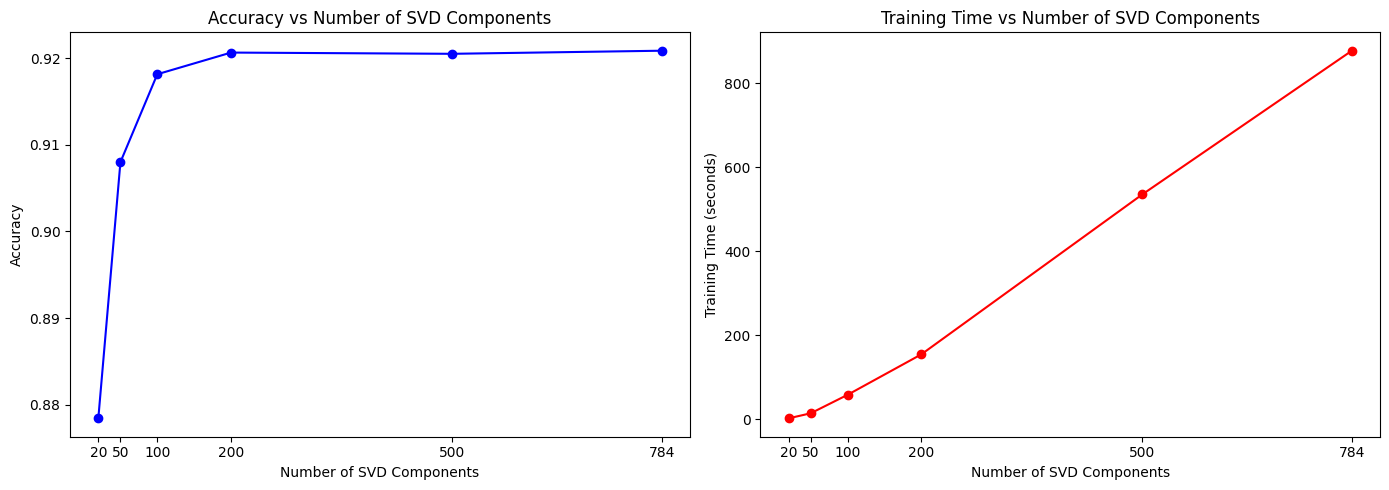

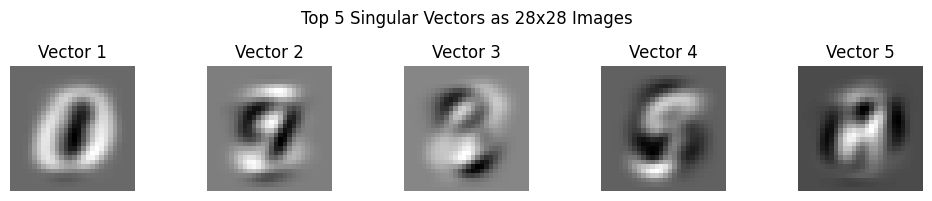

In [5]:
components = [r[0] for r in results]
accuracies = [r[1] for r in results]
training_times = [r[2] for r in results]

# Plot accuracy and training time vs. number of SVD components
plt.figure(figsize=(14, 5))

# Subplot 1: Accuracy vs Number of Components
plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o', color='blue')
plt.title('Accuracy vs Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.xticks(components)  # Ensure all components are shown

# Subplot 2: Training Time vs Number of Components
plt.subplot(1, 2, 2)
plt.plot(components, training_times, marker='o', color='red')
plt.title('Training Time vs Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.xticks(components)  # Ensure all components are shown

plt.tight_layout()
plt.show()

# Function to visualize the top 5 singular vectors
def visualize_singular_vectors(U, n_vectors=5):
    """
    Visualizes the top n_vectors singular vectors from the U matrix.

    Args:
        U: Matrix containing the singular vectors (output from apply_svd_custom).
        n_vectors: Number of top singular vectors to visualize.
    """
    plt.figure(figsize=(10, 2))

    for i in range(n_vectors):
        plt.subplot(1, n_vectors, i + 1)
        # Reshape the singular vector into a 28x28 image
        plt.imshow(U[:, i].reshape(28, 28), cmap='gray')
        plt.title(f"Vector {i+1}")
        plt.axis('off')

    plt.suptitle('Top 5 Singular Vectors as 28x28 Images')
    plt.tight_layout()
    plt.show()

# Visualize the top 5 singular vectors from the last SVD run (e.g., for n_components = 20)
visualize_singular_vectors(U_all[-1], n_vectors=5)  # Change the index for different SVD runs

## Part 6: Analyze / Conclusion

YOUR ANSWER:

In [ ]:
#As shown in the plots and visualizations,as the number of SVD components increases, the accuracy increases at a diminishing rate, with very high return at lower SVD components.
#Furthermore, as the number of SVD components, the training time increases as expected since there is more data to process.
#The singular vectors as 28x28 images are just blurrier versions of the original image that contain less information but are still able to convey the same symbol.